In [1]:
import math
import numpy as np
import os
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display
from graphviz import Graph

In [2]:
dataframe = pd.read_csv("hybrid_data.csv")

In [3]:
dataframe

,Name,Fifa note,speed,favorite meal,nationality,world cups
0,Toni Kroos,90,70,pasta,German,1
1,David De Gea,91,70,fries,Spanish,0
2,Sergio Ramos,91,80,pasta,Spanish,1
3,Kilyan Mbappé,100,100,fries,French,1
4,Mohammed Salah,88,95,pasta,Egyptian,0
5,Mats Hummels,80,73,vegetables,German,1


In [4]:
nb_players = len(dataframe.index)
print(nb_players)

6


In [5]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           6 non-null      object
 1   Fifa note      6 non-null      int64 
 2   speed          6 non-null      int64 
 3   favorite meal  6 non-null      object
 4   nationality    6 non-null      object
 5   world cups     6 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 420.0+ bytes
None


In [6]:
print(dataframe.columns)

Index(['Name', 'Fifa note', 'speed', 'favorite meal', 'nationality',
       'world cups'],
      dtype='object')


In [7]:
print(dataframe.head(10))

             Name  Fifa note  speed favorite meal nationality  world cups
0      Toni Kroos         90     70         pasta      German           1
1    David De Gea         91     70         fries     Spanish           0
2    Sergio Ramos         91     80         pasta     Spanish           1
3   Kilyan Mbappé        100    100         fries      French           1
4  Mohammed Salah         88     95         pasta    Egyptian           0
5    Mats Hummels         80     73    vegetables      German           1


In [8]:
player_id = 1
print(f"---\nall information on player {player_id}\n---")
print(dataframe.loc[player_id])

---
all information on player 1
---
Name             David De Gea
Fifa note                  91
speed                      70
favorite meal           fries
nationality           Spanish
world cups                  0
Name: 1, dtype: object


In [9]:
def compute_dissimilarity(player_1_id, player_2_id):
    """
        Compute  dissimilarity betwwen two players
        based on their id.

        The meal is not a quantitative attribute.
        It is called a categorical variable.
        We must handle it differently than quantitative
        attributes.

        EDIT THIS FUNCTION
    """
    dissimilarity = 0
    dissimilarity += c_note * abs(dataframe.loc[player_1_id, "Fifa note"] - dataframe.loc[player_2_id, "Fifa note"])
    dissimilarity += c_speed * abs(dataframe.loc[player_1_id, "speed"] - dataframe.loc[player_2_id, "speed"])
    dissimilarity += c_nat * abs(dataframe.loc[player_1_id, "nationality"] != dataframe.loc[player_2_id, "nationality"])
    dissimilarity += c_meal * abs(dataframe.loc[player_1_id, "favorite meal"] != dataframe.loc[player_2_id, "favorite meal"])
    dissimilarity += c_world_cups * abs(dataframe.loc[player_1_id, "world cups"] - dataframe.loc[player_2_id, "world cups"])
    return dissimilarity

In [50]:
# build a dissimilarity matrix
c_note = 0.2
c_speed = 0.4
c_nat = 0.3
c_meal = 1.5
c_world_cups = 0.1
dissimilarity_matrix = np.zeros((nb_players, nb_players))
print("compute dissimilarities")
for player_1_id in range(nb_players):
    for player_2_id in range(nb_players):
        dissimilarity = compute_dissimilarity(player_1_id, player_2_id)
        dissimilarity_matrix[player_1_id, player_2_id] = dissimilarity

# print("dissimilarity matrix")

compute dissimilarities


In [51]:
dissimilarity_matrix

array([[ 0. ,  2.1,  4.5, 15.8, 10.8,  4.7],
       [ 2.1,  0. ,  5.6, 14.2, 12.4,  5.3],
       [ 4.5,  5.6,  0. , 11.6,  7. ,  6.8],
       [15.8, 14.2, 11.6,  0. ,  6.3, 16.6],
       [10.8, 12.4,  7. ,  6.3,  0. , 12.3],
       [ 4.7,  5.3,  6.8, 16.6, 12.3,  0. ]])

In [52]:
mean_dissimilarity = dissimilarity_matrix.mean()

In [53]:
THRESHOLD = mean_dissimilarity
# build a graph from the dissimilarity
dot = Graph(comment='Graph created from complex data',
            strict=True)
for player_id in range(nb_players):
    player_name = dataframe.loc[player_id][0]
    dot.node(player_name)

for player_1_id in range(nb_players):
    # we use an undirected graph so we do not need
    # to take the potential reciprocal edge
    # into account
    for player_2_id in range(player_1_id +1, nb_players):
        player_1_name = dataframe.loc[player_1_id][0]
        player_2_name = dataframe.loc[player_2_id][0]
    
        if dissimilarity_matrix[player_1_id, player_2_id] < THRESHOLD:
            dot.edge(player_1_name,
                    player_2_name,
                    color='darkolivegreen4',
                    penwidth='1.1')

# visualize the graph
# dot.attr(label=f"threshold {threshold:.2f}", fontsize='20')
fig_name = f"complex_data_{c_note}_{c_speed}_{c_meal}_{c_nat}_{c_world_cups}_th_{THRESHOLD:.2E}"
fig_name = fig_name.replace(".", "_")
graph_name = os.path.join("images", fig_name)
dot.render(graph_name)

'images/complex_data_0_2_0_4_1_5_0_3_0_1_th_7_56E+00.pdf'

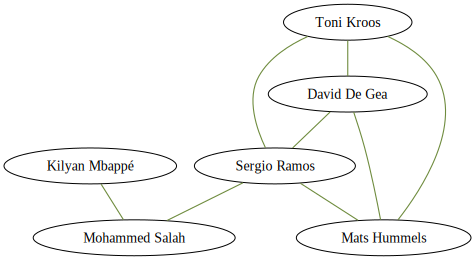

In [54]:
dot